In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup as BS
import re
import glob
from io import StringIO
from scrapy import Selector
import spacy

nlp = spacy.load('en',tagger=False, parser=False, matcher=False)
plt.style.use('ggplot')

In [22]:
path = r'E:\NSS\nss_data_science\dq9-edgar-the-gators-master\data' 
all_data = glob.glob(path + "\*.htm")

In [23]:
#read_html only parse table
list_htms = [open(htm).read() for htm in all_data]

In [36]:
sel = Selector(text = list_htms[8])
target_tags = sel.xpath("//p[contains(@style, font-size) or contains(@style, font)]").extract()
if not target_tags:
     target_tags = sel.xpath("//font[contains(@style, font-size) or contains(@style, font)]").extract()

#font_size = [int(re.search(r'font.+:\s*(\d+)pt', x).group(1)) for x in target_tags if re.search(r'pt', x)]
#re.sub(r'<.+?>', '', sel.xpath("//p[contains(@style, '{}')]".format(max(font_size))).extract()[0])

content = [re.sub(r'<.+?>', '', x) for x in target_tags] 

content = [x for x in content if not re.search(r'\d|\xa0', x)]

for x in content:    

    doc = nlp(x)

    for ent in doc.ents:
        if ent.label_ == 'ORG':
            print(ent.text)

Stated Maturity
Final Maturity Date
Stated Maturity
Floating Rate/Fixed Rate Note
Federal Funds (Effective) Rate
Reuters
Deutsche Bank Trust Company
Mizuho Securities USA LLC
SG

Americas Securities
LLC
Mizuho Securities USA LLC
SG Americas Securities
the Securities and Exchange Commission
Merrill Lynch
ANZ Securities
Mellon Capital Markets
LLC
Citigroup
Lloyds Securities
SEC
American Honda Finance Corporation
American Honda Finance Corporation
Honda Motor Co. Ltd.
AHFC
AHFC
HMC
AHFC
the Alternative Reference Rates Committee
the Federal Reserve Board
the Federal Reserve Bank
AHFC
the Federal Deposit
Insurance Corporation
AHFC
AHFC
HMC
AHFC
AHFC
AHFC
AHFC
AHFC
AHFC
AHFC
AHFC
AHFC
AHFC
AHFC
AHFC
AHFC
AHFC
AHFC
AHFC
AHFC
euros
the Principal Financial Center
the Eleventh District Cost of Funds Rate
the Federal Funds Rate
the Prime Rate
the Treasury Rate
Interest Rate Basis
Inverse Floating Rate Note
Floating Rate/Fixed Rate Note
the Interest Rate Basis or Bases
the Interest Rate Basis or

In [141]:
target_tags

['<p style="margin-top:0pt; margin-bottom:0pt; font-size:10pt; font-family:Times New Roman" align="right">This filing is made pursuant to Rule 424(b)(2)<br>under the Securities Act of 1933 in\nconnection with <br>Registration No. 333-233119<br> </p>',
 '<p style="font-size:12pt;margin-top:0pt;margin-bottom:0pt">\xa0</p>',
 '<p style="margin-top:0pt; margin-bottom:0pt; font-size:8pt; font-family:Times New Roman">PRICING SUPPLEMENT DATED October\xa010, 2019</p>',
 '<p style="margin-top:0pt; margin-bottom:1pt; font-size:8pt; font-family:Times New Roman">(To Prospectus dated August\xa08, 2019 and Prospectus Supplement dated August\xa08, 2019)</p>',
 '<p style="font-size:6pt;margin-top:0pt;margin-bottom:0pt">\xa0</p>',
 '<p style="font-size:6pt;margin-top:0pt;margin-bottom:0pt">\xa0</p>',
 '<p style="margin-top:0pt;margin-bottom:0pt" align="center">\n\n\n<img src="g816260g71d93.jpg" alt="LOGO">\n </p>',
 '<p style="font-size:12pt;margin-top:0pt;margin-bottom:0pt">\xa0</p>',
 '<p style="marg

In [126]:
list_output = []

for htm in list_htms:
    
    output = dict({'issuer_name': ''})
    
    sel = Selector(text = htm)
    target_tags = sel.xpath("//p[contains(@style, font-size) or contains(@style, font)]").extract()
    if not target_tags:
         target_tags = sel.xpath("//font[contains(@style, font-size) or contains(@style, font)]").extract()

    #font_size = [int(re.search(r'font.+:\s*(\d+)pt', x).group(1)) for x in target_tags if re.search(r'pt', x)]
    #re.sub(r'<.+?>', '', sel.xpath("//p[contains(@style, '{}')]".format(max(font_size))).extract()[0])

    content = [re.sub(r'<.+?>', '', x) for x in target_tags] 

    content = [x for x in content if not re.search(r'\d|\xa0', x)]
 
    for x in content:    

        doc = nlp(x)

        if output['issuer_name'] == '':
            for ent in doc.ents:
                if ent.label_ == 'ORG':
                    output['issuer_name'] = ent.text

        else: break
            
    list_output.append(output)

df_3 = pd.DataFrame(list_output,index=[re.search(r'data\\(.+htm)$',x).group(1) for x in all_data])

In [127]:
df_3

,issuer_name
424B2_a19-18449_4424b2.htm,CUSIP / ISIN
424B2_a19-18449_5424b2.htm,CUSIP / ISIN
424B2_a19-18449_6424b2.htm,CUSIP / ISIN
424B2_a19-18959_1424b2.htm,Ford Motor Credit Company LLC
424B2_a20-1355_3424b2.htm,CUSIP / ISIN
424B2_a20-1355_4424b2.htm,CUSIP / ISIN
424B2_d26200424b2.htm,Royal\nBank of Canada
424B2_d795231d424b2.htm,Air Lease Corporation
424B2_d816260d424b2.htm,Stated Maturity
424B2_d833231d424b2.htm,Benchmark Replacement Date


In [56]:
#"//*[contains(@align,'center') or contains(@style,'text-align:center') \ or contains(@style,'text-align: center')]"

list_output = []

for htm in list_htms:
    
    output = dict()

    sel = Selector(text = htm)
    target_tags = sel.xpath("//p[contains(@style, font-size) or contains(@style, font)]").extract()
    
    if not target_tags:
         target_tags = sel.xpath("//font[contains(@style, font-size) or contains(@style, font)]").extract()
        
    texts = [re.sub(r'<.+?>', '', x) for x in target_tags]

    for text in texts:
        
        text = text.replace('\xa0', '')
        text = re.sub('(.+)\n(.+)', r'\1\2', text)
        
        #match_issuer = re.match(r'.+', text)
        match_security = re.search(r'.+due.+\d{4}', text, re.IGNORECASE)
        #match_digit_comma = re.search(r'[\d,-]', text)

#         if match_issuer and not match_digit_comma:
#             output.update({'issuer_name':match_issuer.group(0)})

        if match_security:

            output.update({'security_description' : match_security.group(0)})
            break
            
    list_output.append(output) # append the output for each file 
    
df_2 = pd.DataFrame(list_output,index=[re.search(r'data\\(.+htm)$',x).group(1) for x in all_data])

In [57]:
df_2

,security_description
424B2_a19-18449_4424b2.htm,"$400,000,000 Floating Rate Senior Notes Due Ju..."
424B2_a19-18449_5424b2.htm,"$400,000,000 1.950% Fixed Rate Senior Notes Du..."
424B2_a19-18449_6424b2.htm,"$450,000,000 2.250% Fixed Rate Senior Notes Du..."
424B2_a19-18959_1424b2.htm,"$600,000,000 3.550% Fixed Rate Notes Due 2022"
424B2_a20-1355_3424b2.htm,"$550,000,000 2.450% Fixed Rate Senior Notes Du..."
424B2_a20-1355_4424b2.htm,"$550,000,000 2.050% Fixed Rate Senior Notes Du..."
424B2_d26200424b2.htm,"Due August 5, 2022"
424B2_d795231d424b2.htm,"2.250% Medium-Term Notes, Series A, due Januar..."
424B2_d816260d424b2.htm,"offering and sale of $500,000,000 aggregate pr..."
424B2_d833231d424b2.htm,"UST 1.375% due January31, 2025"


In [6]:
df_2 = df_2.reset_index()
df_2['coupon_type_code'] = ['Float' if re.search(r'float', str(x), re.IGNORECASE) else 'Fix' for x in df_2.security_description]

In [16]:
df_2.to_csv('xin_1.csv', index=False)

In [213]:
for doc in pd.read_html(all_data[26]): # loop over the tables in the docs
    file = pd.concat([file, doc], 0, ignore_index=True) # concatnate the tables as one dataframe

file = file.dropna(axis=0, how='all').fillna('') # drop the rows containning all NAs
cols = file.columns

file['column'] = ""

for col in cols:
    file['column'] = file['column'] + file[col].astype('str') # merge all columns to the new one

file = pd.DataFrame(file.column).drop_duplicates(keep='first')

In [214]:
file[file.column.str.contains('CUSIP')].values

array([['CUSIP No.:471048 CG1471048 CG1471048 CG1CUSIP No.:471048 CG1471048 CG1471048 CG1']],
      dtype=object)

In [6]:
# # . could match everything but '\n'
# # previous pattern r'(.{0,17}[acdmi]\w+:\W*.{1,60}\d)
# for i in range(0,len(list_htms)):
#     soup = BS(list_htms[i])
#     string = soup.text.replace('\xa0','')
#     print('[{}]'.format(i) + ' :' + all_data[i][-26:])
#     print(re.findall(r'\b[ACMIPS].+[tesyNPd)\*]\s?:\W*.{1,60}\d', string))
#     print('_______________________________________________________________________')

In [58]:
check_list = []
len_word = []
for i in range(0,len(list_htms)):
    soup = BS(list_htms[i])
    string = soup.text.replace('\xa0','')
    string = re.sub('(.+)\n(.+)', r'\1\2', string)
    file_name = '#{}'.format(i) + ' :' + all_data[i][-26:]
    check_list.append(file_name)
    temp_list = re.findall(r'\b[ACMIPS].+:\W*.+', string)
    temp_len_word = [len(x) for x in temp_list]
    len_word.append(temp_len_word)
    for x in temp_list:
        if x.find(':') <40 and len(x) < 600:
            check_list.append(x.replace('\n', ""))
    check_df = pd.DataFrame(check_list, columns=['value'])

In [59]:
import itertools 
chain_object = itertools.chain.from_iterable(len_word)
flattened_list = list(chain_object)

Text(0, 0.5, 'length of values')

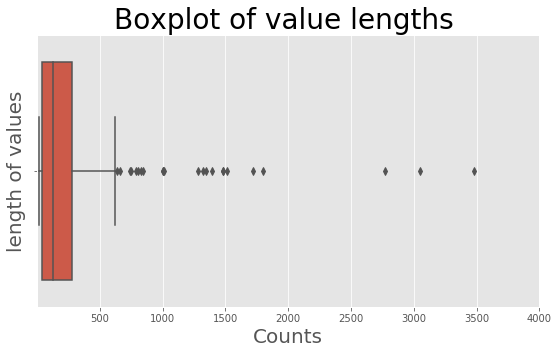

In [60]:
fig, ax = plt.subplots(figsize=(9,5))
ax = sns.boxplot(x=flattened_list)
ax.set_xlim([1, 4000]) 
ax.set_title("Boxplot of value lengths ", fontsize=28)
ax.set_xlabel("Counts",fontsize=20)
ax.set_ylabel("length of values",fontsize=20)

In [5]:
#check_df.loc[check_df.value.str.contains(r'[Pp]ayment.+:')].value.str.len().max()

In [6]:
# This pattern has match groups. To actually get the groups, use str.extract.
# To check if I got all info I want
check_df[check_df.value.str.contains(r'Maturity|#')].values

array([['#0 :424B2_a19-18449_4424b2.htm'],
       ['Maturity Date:  June13, 2022  '],
       ['Index Maturity:  3-Month  '],
       ['#1 :424B2_a19-18449_5424b2.htm'],
       ['Maturity   Date:  June13,   2022  '],
       ['#2 :424B2_a19-18449_6424b2.htm'],
       ['Maturity Date: September14, 2026  '],
       ['#3 :424B2_a19-18959_1424b2.htm'],
       ['Stated Maturity:  October7, 2022  '],
       ['Maturity:  3.578%  '],
       ['#4 :\\424B2_a20-1355_3424b2.htm'],
       ['Maturity Date: January9, 2030  '],
       ['#5 :\\424B2_a20-1355_4424b2.htm'],
       ['Maturity Date: January9, 2025  '],
       ['#6 :data\\424B2_d26200424b2.htm'],
       ['Maturity Date:August 5, 2022'],
       ['#7 :ta\\424B2_d795231d424b2.htm'],
       ['Stated Maturity: January15, 2023 Interest Rate: 2.250% per annum, accruing from September16, 2019 '],
       ['Interest Payment Dates: Each January15 and July15, beginning on January15, 2020 (short first coupon), and at Maturity  PS-1 '],
       ['Convention:

In [13]:
def extract_raw_info(data):
    
    list_output = []
    
    for htm in data: # loop over the htms in the list
        
        string = BS(htm).text.replace('\xa0','')
        
        string = re.sub('(.+)\n(.+)', r'\1\2', string)
        
        fields = re.findall(r'\b[ACMIPS].+:\W*.+', string)
        
        output = dict({'issuer_name': [], 'cusip_id': [], 'isin_id': [], 
                       'original_face_amount': [], 'maturity_date': [], 'cpn_pay_frq_code': []})

        # convert august to digit and remove comma
        for value in fields: # iterate the index and value for each row in the file
           
            if value.find(':') <40 and len(value) < 600:
            # match each fileds needed to be extracted out
                value = value.replace('\n', "")# remove '\n' cause . does not match it in python by default
                match_issuer = re.match(r'Issuer:(.+)', value)
                #match_security = re.search(r'([A-Z].+)[Dd]ue.+\d', value.col)
                match_cusip =  re.match(r'CUSIP.*:\W*(\w{9})', value, re.IGNORECASE)
                match_isin =  re.search(r'ISIN.*:.*(\w{12})', value, re.IGNORECASE)
                match_amount =  re.search(r'Amount.?:(.+\w)', value, re.IGNORECASE)
                match_maturity = re.search(r'Maturity.*:(.+\d{4})', value, re.IGNORECASE)
                match_frequency = re.search(r'Payment Dates.?:(.+)', value, re.IGNORECASE)

                # if matched, extract the relevant groups and update the key-value pairs in the dict of output
                if match_issuer:
                    output['issuer_name'].append(match_issuer.group(1))
        #             elif match_security:
        #                 output.update({'security_description' : match_security.group(1)})
                if match_cusip:
                    output['cusip_id'].append(match_cusip.group(1))
                if match_isin:#?? there is isin but no cusip
                    output['isin_id'].append(match_isin.group(1))
                if match_amount:
                    output['original_face_amount'].append(match_amount.group(1))
                if match_maturity:
                    output['maturity_date'].append(match_maturity.group(1))
                if match_frequency:
                    output['cpn_pay_frq_code'].append(match_frequency.group(1))
       
        list_output.append(output) # append the output for each file 
        
    return (pd.DataFrame(list_output,index=[re.search(r'data\\(.+htm)$',x).group(1) for x in all_data])) #convert to dataframe

In [14]:
df = extract_raw_info(list_htms)

In [15]:
df_1 = df.reset_index()

In [16]:
df_1

,index,issuer_name,cusip_id,isin_id,original_face_amount,maturity_date,cpn_pay_frq_code
0,424B2_a19-18449_4424b2.htm,[],[24422EUZ0],[US24422EUZ05],"[ $400,000,000]","[ June13, 2022]","[ Quarterly on the 13th of March, June, Sep..."
1,424B2_a19-18449_5424b2.htm,[],[24422EVA4],[US24422EVA45],"[ $400,000,000]","[ June13, 2022]",[]
2,424B2_a19-18449_6424b2.htm,[],[24422EVB2],[US24422EVB28],"[ $450,000,000]","[ September14, 2026]","[ Semi-annually on March14 and September14, ..."
3,424B2_a19-18959_1424b2.htm,[ Ford Motor Credit Company LLC ],[34540XAB9],[US34540XAB91],"[ $600,000,000]","[ October7, 2022]",[ Semi-annually on each April7 and October7...
4,424B2_a20-1355_3424b2.htm,[],[24422EVD8],[US24422EVD83],"[ $550,000,000]","[ January9, 2030]","[ Semi-annually on January9 and July9, commenc..."
5,424B2_a20-1355_4424b2.htm,[],[24422EVC0],[US24422EVC01],"[ $550,000,000]","[ January9, 2025]","[ Semi-annually on January9 and July9, commenc..."
6,424B2_d26200424b2.htm,[Royal Bank of Canada (the “Bank”)],[78015K7F5],[US78015K7F50],"[US $300,000,000]","[August 5, 2022]","[Quarterly on the 5th of each February, May, A..."
7,424B2_d795231d424b2.htm,[],"[September, 00914AAE2]","[US00914AAD46, US00914AAE29]","[ $600,000,000, $500,000,000 Trade Date: Sept...","[ 2.250% per annum, accruing from September16,...","[ Each January15 and July15, beginning on Janu..."
8,424B2_d816260d424b2.htm,[],[02665WDE8],[],"[ $500,000,000]","[ February15, 2022, 0.0933]","[ Each February15, May15, August 15 andNovembe..."
9,424B2_d833231d424b2.htm,[],[95000U2K8],[],[],"[ February11, 2026]","[ Each February11 and August11, commencing Aug..."


In [15]:
df_1.to_csv('xin.csv', index=False)